## PROJET ECONOMETRIE SUR PYTHON

## INTRODUCTION

Le jeu de données faisant l’objet de cette analyse est relatif à des données d’assurance. Il contient 2765 clients d’une 
société d’assurance IARD (assurance non vie), assurance auto

### Importation des packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from scipy.stats import skew, kurtosis, stats
from statistics import mean
from turtle import color

### Les fonctions a utiliser

In [25]:
def graph(vecteur):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Boîte à moustaches
    ax[0].boxplot(vecteur, showmeans=True)
    ax[0].axhline(np.mean(vecteur), color='red', linestyle='dashed', linewidth=1)  # Ajouter la moyenne
    moyenne= np.mean(vecteur)
    mediane=np.median(vecteur)
    ax[0].axhline(np.median(vecteur), color='green', linestyle='dashed', linewidth=1)  # Ajouter la médiane
    ax[0].set_title('Boxplot (Moyenne = {:.2f}, Mediane = {:.2f})'.format(moyenne, mediane))

    # Histogramme
    sns.histplot(vecteur, bins=10, color='skyblue', edgecolor='black', ax=ax[1])
    ax[1].axvline(np.mean(vecteur), color='red', linestyle = 'dashed', linewidth = 1)
    skewness = skew(vecteur)
    kurt = kurtosis(vecteur)
    ax[1].set_title('Histogram (Skewness = {:.2f}, Kurtosis = {:.2f})'.format(skewness, kurt))

    # KDE plot
    sns.kdeplot(vecteur, color='orange', ax=ax[2])
    ax[2].axvline(moyenne, color='red', linestyle='dashed', linewidth=1) 
    ax[2].set_title('KDE Plot (Moyenne = {:.2f})'.format(moyenne))
       
    plt.tight_layout()
    plt.show()

def akposso_qt_resume(vecteur):
    res1 = np.min(vecteur)
    res2 = np.max(vecteur)
    res3 = vecteur.mode().iloc[0] if not vecteur.mode().empty else np.nan
    res4 = np.median(vecteur)
    res5 = np.mean(vecteur)
    res6 = np.percentile(vecteur, [0, 25, 50, 75, 100])
    res7 = np.std(vecteur) / res5 if res5 != 0 else np.nan
    res8 = np.var(vecteur)
    res9 = np.std(vecteur)
    res10 = skew(vecteur, nan_policy='omit')
    interpskew = 'distribution étalée à gauche' if res10 < 0 else 'distribution étalée à droite'
    res11 = kurtosis(vecteur, fisher=False, nan_policy='omit')
    interpkurt = 'distribution platikurtique' if res11 < 3 else 'distribution leptokurtique'
    
    return {
        'le minimum est ': res1,
        'le maximum est ': res2,
        'le mode est ': res3,
        'la mediane est ': res4,
        'la moyenne est ': res5,
        'les quartiles sont': res6,
        'le coefficient_variation est': res7,
        'la variance est': res8,
        'l’ecart_type est': res9,
        'le coefficient_assymetrie ou skewness est': res10,
        'le cofficent_applatissement ou Kurtosis est': res11,
    }    


## Importation des donnees et analyse descriptive

### Analyse de la structure du dataframe

In [5]:
# Importation du jeu de donnée
data = pd.read_csv("C:/COURS_INSEEDS/PROJET_ECO/actuar.csv", sep=";")

In [6]:
data.head()

,nocontrat,exposition,zone,puissance,agevehicule,ageconducteur,bonus,marque,carburant,densite,region,nbre,no,garantie,cout
0,217,0.74,A,5,4,31,64,3,D,21,8,1,17001,1RC,0.00
1,709,0.18,B,7,8,22,100,2,E,26,0,1,17419,1RC,0.00
2,714,0.48,C,9,0,32,61,12,E,41,13,1,15851,4BG,687.82
3,852,0.27,F,7,5,39,100,12,E,11,0,1,21407,2DO,96.64
4,1083,0.51,E,4,0,49,50,12,E,31,13,1,15589,2DO,70.88


Notre dataframe a ete correctement importe ete affecte a la variable data.

In [7]:
# Inspection de la structure des donnees
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nocontrat      2765 non-null   int64  
 1   exposition     2765 non-null   float64
 2   zone           2765 non-null   object 
 3   puissance      2765 non-null   int64  
 4   agevehicule    2765 non-null   int64  
 5   ageconducteur  2765 non-null   int64  
 6   bonus          2765 non-null   int64  
 7   marque         2765 non-null   int64  
 8   carburant      2765 non-null   object 
 9   densite        2765 non-null   int64  
 10  region         2765 non-null   int64  
 11  nbre           2765 non-null   int64  
 12  no             2765 non-null   int64  
 13  garantie       2765 non-null   object 
 14  cout           2765 non-null   float64
dtypes: float64(2), int64(10), object(3)
memory usage: 324.2+ KB
None


Notre data frame comporte: 
2765 lignes, 15 variables dont 10 numeriques, 2 floats et 3 objets.
Dans le cadre de notre etude il y a des variables numeriques qui sont en realite des variables qualitatives:
les variables marque et region.

In [8]:
# Convertir les variables marque et region en object.
var_conv = ['marque', 'region']
data[var_conv]= data[var_conv].astype('object')

In [9]:
# Verification de la conersion de marque et region en objet
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nocontrat      2765 non-null   int64  
 1   exposition     2765 non-null   float64
 2   zone           2765 non-null   object 
 3   puissance      2765 non-null   int64  
 4   agevehicule    2765 non-null   int64  
 5   ageconducteur  2765 non-null   int64  
 6   bonus          2765 non-null   int64  
 7   marque         2765 non-null   object 
 8   carburant      2765 non-null   object 
 9   densite        2765 non-null   int64  
 10  region         2765 non-null   object 
 11  nbre           2765 non-null   int64  
 12  no             2765 non-null   int64  
 13  garantie       2765 non-null   object 
 14  cout           2765 non-null   float64
dtypes: float64(2), int64(8), object(5)
memory usage: 324.2+ KB
None


En observant la sructure de notre data frame nous constatons que pour les 14 variables il n'y a pas de valeurs manquantes.

<Axes: >

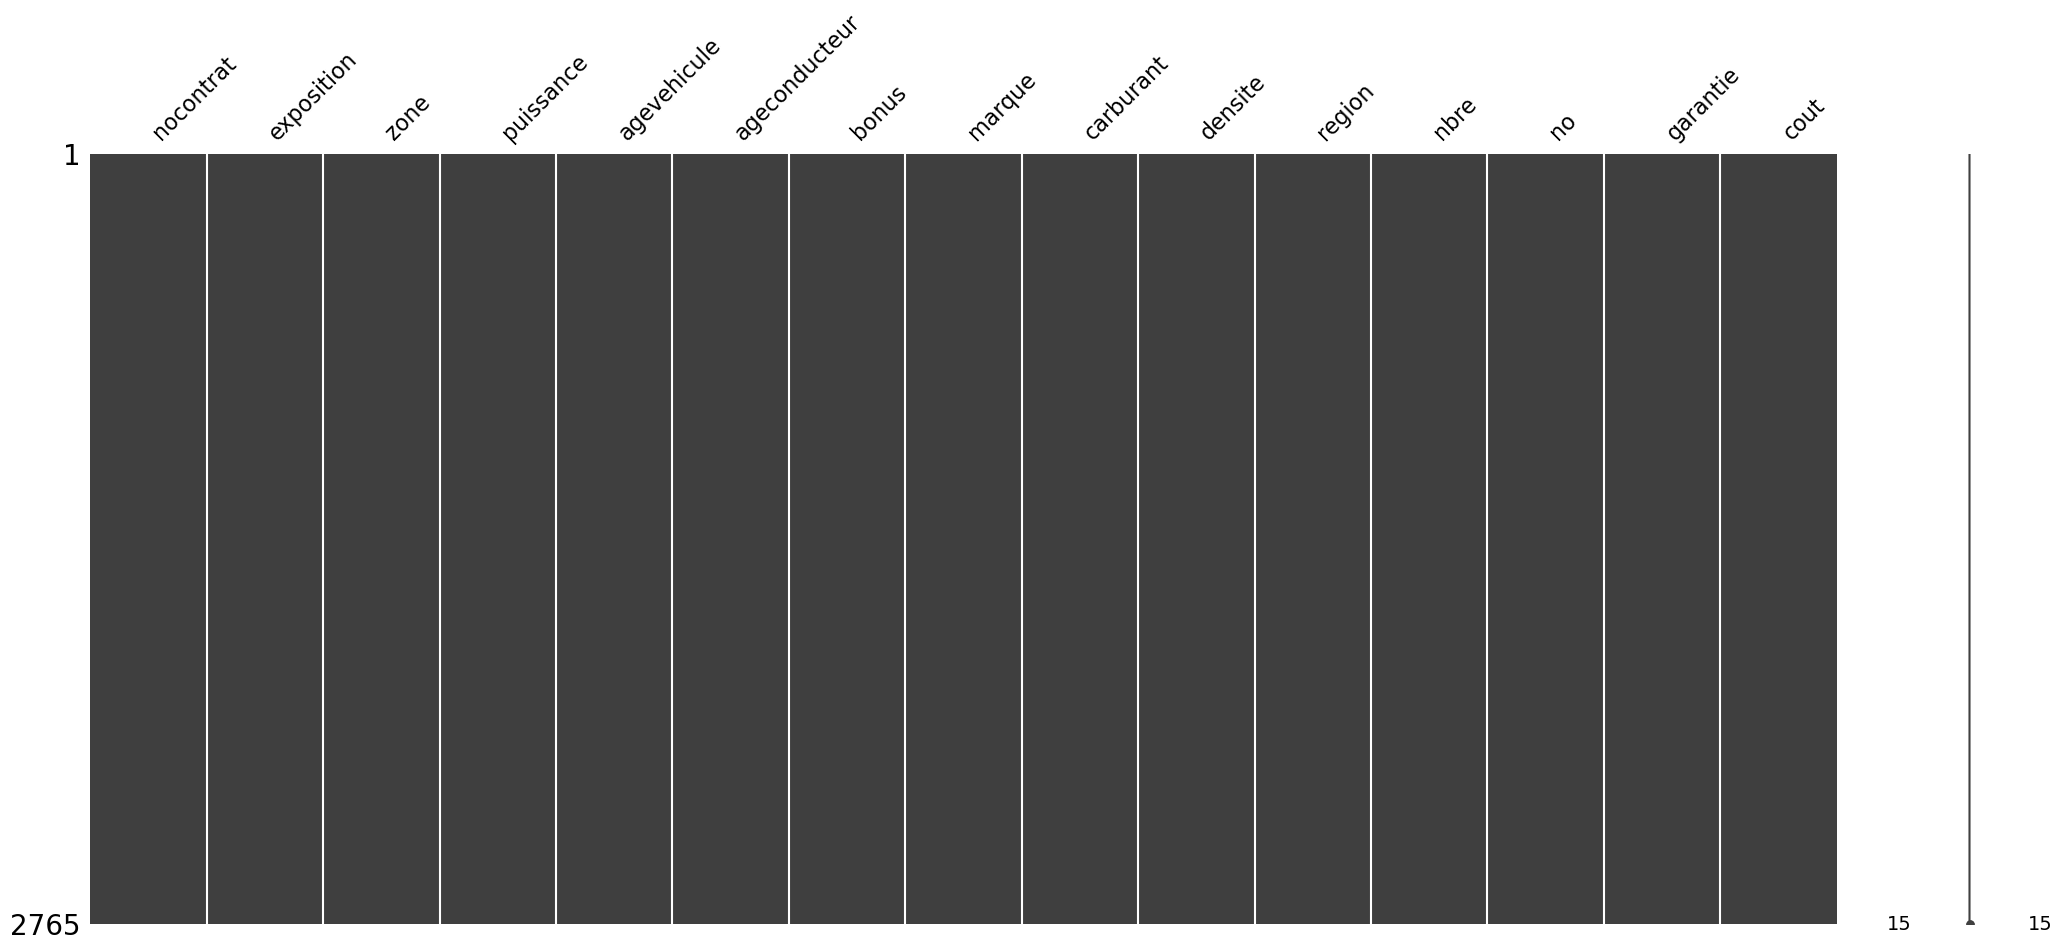

In [10]:
# Verification des variables par le graphique.
msno.matrix(data)

Nous constatons encore une fois que notre dataframe ne comporte aucune donnee manquante.

In [11]:
# Division du dataframe en deux data-frame, variables quantitatives et variables qualitatives
data_var_quanti = data.select_dtypes(include=['int', 'float'])
data_var_quali = data.select_dtypes(include=['object'])

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nocontrat      2765 non-null   int64  
 1   exposition     2765 non-null   float64
 2   zone           2765 non-null   object 
 3   puissance      2765 non-null   int64  
 4   agevehicule    2765 non-null   int64  
 5   ageconducteur  2765 non-null   int64  
 6   bonus          2765 non-null   int64  
 7   marque         2765 non-null   object 
 8   carburant      2765 non-null   object 
 9   densite        2765 non-null   int64  
 10  region         2765 non-null   object 
 11  nbre           2765 non-null   int64  
 12  no             2765 non-null   int64  
 13  garantie       2765 non-null   object 
 14  cout           2765 non-null   float64
dtypes: float64(2), int64(8), object(5)
memory usage: 324.2+ KB
None


In [13]:
# Choix des variables quantitatives a utiliser
data_var_quanti = data_var_quanti.drop(['nocontrat', 'no'], axis=1)

In [14]:
# description du data frame
data_var_quanti.describe()

,exposition,puissance,agevehicule,ageconducteur,bonus,densite,nbre,cout
count,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000
mean,0.737445,6.373599,6.209403,44.093309,61.213382,49.110307,1.712477,1069.314908
std,0.298041,1.904473,4.722998,13.955868,16.673832,27.837063,0.963596,3690.147963
min,0.008219,4.000000,0.000000,18.000000,50.000000,11.000000,1.000000,-3811.230000
25%,0.500000,5.000000,2.000000,33.000000,50.000000,24.000000,1.000000,132.670000
50%,0.870000,6.000000,5.000000,43.000000,50.000000,52.000000,1.000000,405.570000
75%,1.000000,7.000000,9.000000,53.000000,68.000000,82.000000,2.000000,1128.120000
max,1.300000,15.000000,35.000000,99.000000,165.000000,94.000000,7.000000,152449.020000


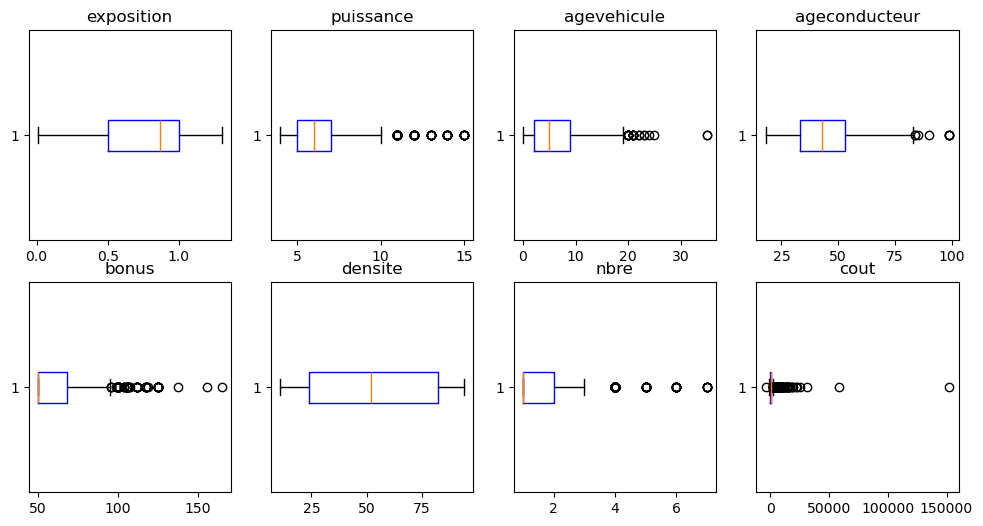

In [15]:
# Verification graphique des variables extremes et valeurs aberrantes
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.ravel()

for i, column in enumerate(data_var_quanti.columns):
    axs[i].boxplot(data_var_quanti[column], vert=False, boxprops=dict(color='blue'))
    axs[i].set_title(column)

plt.show()


En visualisant les graphiques nous contatons des valeurs extremes. N'ayant pas une grande connaissance du metiers assurance nous ne prendrons pas de risques en traitant ces valeurs extremes. Par contre pour la variables cout nous des valeurs negatives qui sont effectivement des valeurs abberantes.


In [16]:
# Traitement des valeurs abberantes de la variable cout.
# Determination de la proportion des observations ayants le cout inferieur a 0.
val_neg = data_var_quanti[data_var_quanti['cout']<0] 
prop = val_neg.count()/data_var_quanti.count()
print(prop)

exposition       0.005787
puissance        0.005787
agevehicule      0.005787
ageconducteur    0.005787
bonus            0.005787
densite          0.005787
nbre             0.005787
cout             0.005787
dtype: float64


Le taux est de 0,5% donc nous pouvons supprimer ces observations.

In [17]:
# Suppressions des observations ayants pour cout de siniste inferieur a 0.
data_var_quanti=data_var_quanti[data_var_quanti['cout'] >= 0] 

In [18]:
data_var_quanti.describe()

,exposition,puissance,agevehicule,ageconducteur,bonus,densite,nbre,cout
count,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.00000,2749.000000,2749.000000
mean,0.737561,6.375409,6.208439,44.096035,61.182612,49.07239,1.712259,1078.619494
std,0.298015,1.904428,4.730648,13.947247,16.653659,27.82443,0.964319,3698.256831
min,0.008219,4.000000,0.000000,18.000000,50.000000,11.00000,1.000000,0.000000
25%,0.500000,5.000000,2.000000,33.000000,50.000000,24.00000,1.000000,137.380000
50%,0.870000,6.000000,5.000000,43.000000,50.000000,52.00000,1.000000,409.930000
75%,1.000000,7.000000,9.000000,53.000000,68.000000,82.00000,2.000000,1128.120000
max,1.300000,15.000000,35.000000,99.000000,165.000000,94.00000,7.000000,152449.020000


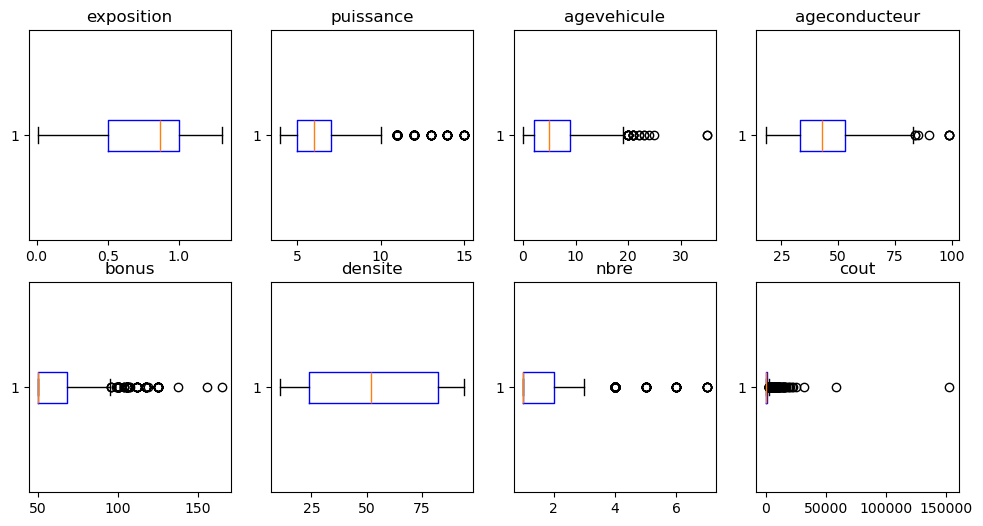

In [19]:
# Verification par les boites a moustache
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.ravel()

for i, column in enumerate(data_var_quanti.columns):
    axs[i].boxplot(data_var_quanti[column], vert=False, boxprops=dict(color='blue'))
    axs[i].set_title(column)

plt.show()

# Statistique univariee des valeurs quantitatives

c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


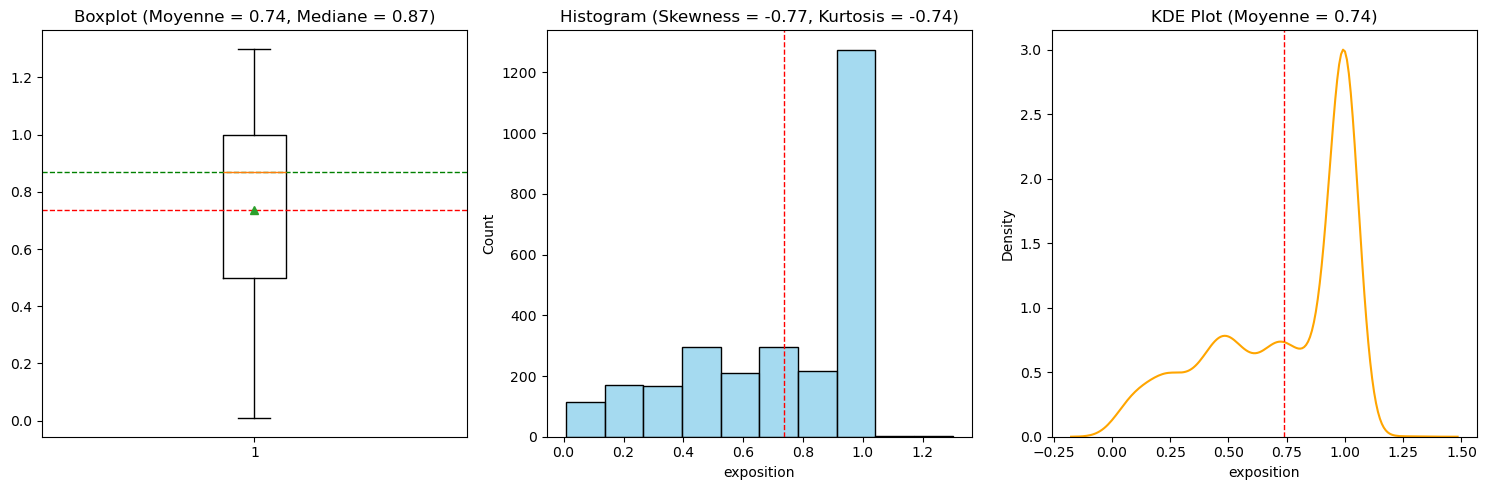

{'le minimum est ': 0.0082191780821917,
 'le maximum est ': 1.3,
 'le mode est ': 1.0,
 'la mediane est ': 0.87,
 'la moyenne est ': 0.7375614544765968,
 'les quartiles sont': array([0.00821918, 0.5       , 0.87      , 1.        , 1.3       ]),
 'le coefficient_variation est': 0.40398038902180305,
 'la variance est': 0.08878037810200516,
 'l’ecart_type est': 0.2979603633069425,
 'le coefficient_assymetrie ou skewness est': -0.7657077441442548,
 'le cofficent_applatissement ou Kurtosis est': 2.256145256404045}

In [26]:
###########------- Etude de la variable exposition -------###########
# Les graphiques
graph(data_var_quanti['exposition']) 
# Le resumé statistique
akposso_qt_resume(data_var_quanti['exposition'])

<span style="color:red;">###########------- Interprétation des résultats de la variable exposition -------###########</span>
<br>
<span style="color:yellow;"> l'exposition moyen de 0.74
<br>
 La valeur du skewness qui est de -0.765 est superieure à -3 donc la distribution étalée à gauche
<br>
 le cofficient d'applatissement ou Kurtosis est de 2.256 donc la distrdistribution est platikurtique
</span>


c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


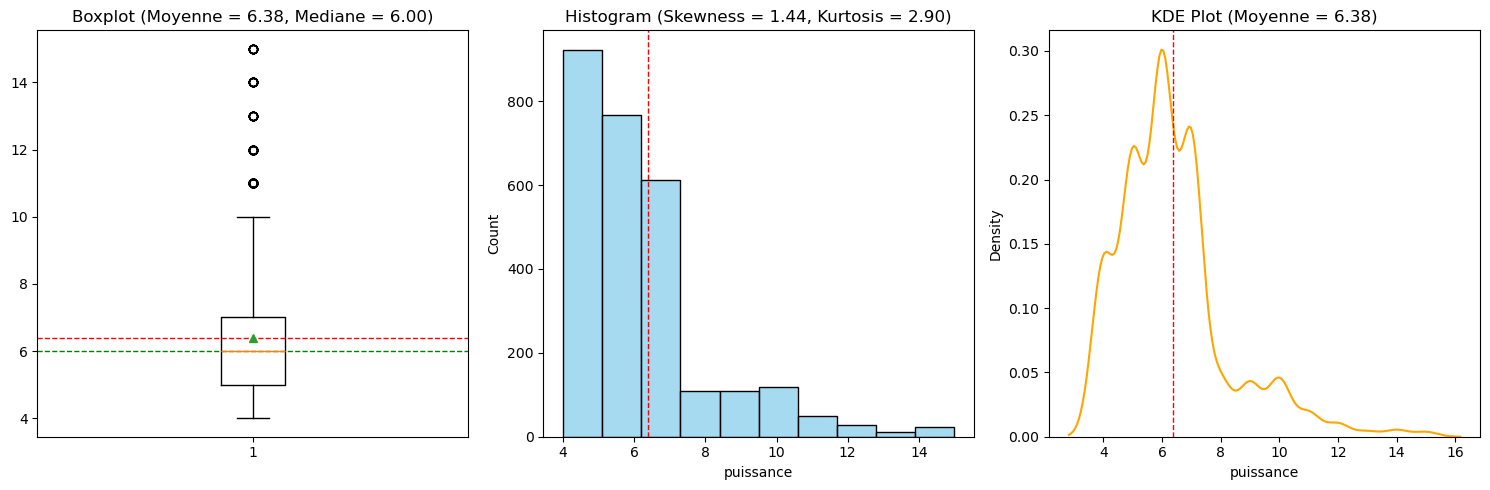

{'le minimum est ': 4,
 'le maximum est ': 15,
 'le mode est ': 6,
 'la mediane est ': 6.0,
 'la moyenne est ': 6.375409239723536,
 'les quartiles sont': array([ 4.,  5.,  6.,  7., 15.]),
 'le coefficient_variation est': 0.2986603641172024,
 'la variance est': 3.6255284338324567,
 'l’ecart_type est': 1.904082044932008,
 'le coefficient_assymetrie ou skewness est': 1.4407788600405431,
 'le cofficent_applatissement ou Kurtosis est': 5.8968683811082006}

In [27]:
###########------- Etude de la variable puissance -------###########
# Les graphiques
graph(data_var_quanti['puissance']) 
# Le resumé statistique
akposso_qt_resume(data_var_quanti['puissance'])

<span style="color:red;">###########------- Interprétation des résultats de la variable exposition -------###########</span>
<br>
<span style="color:yellow;"> l'exposition moyen de 0.74
<br>
 La valeur du skewness qui est de -0.765 est superieure à -3 donc la distribution étalée à gauche
<br>
 le cofficient d'applatissement ou Kurtosis est de 2.256 donc la distrdistribution est platikurtique
</span>

c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


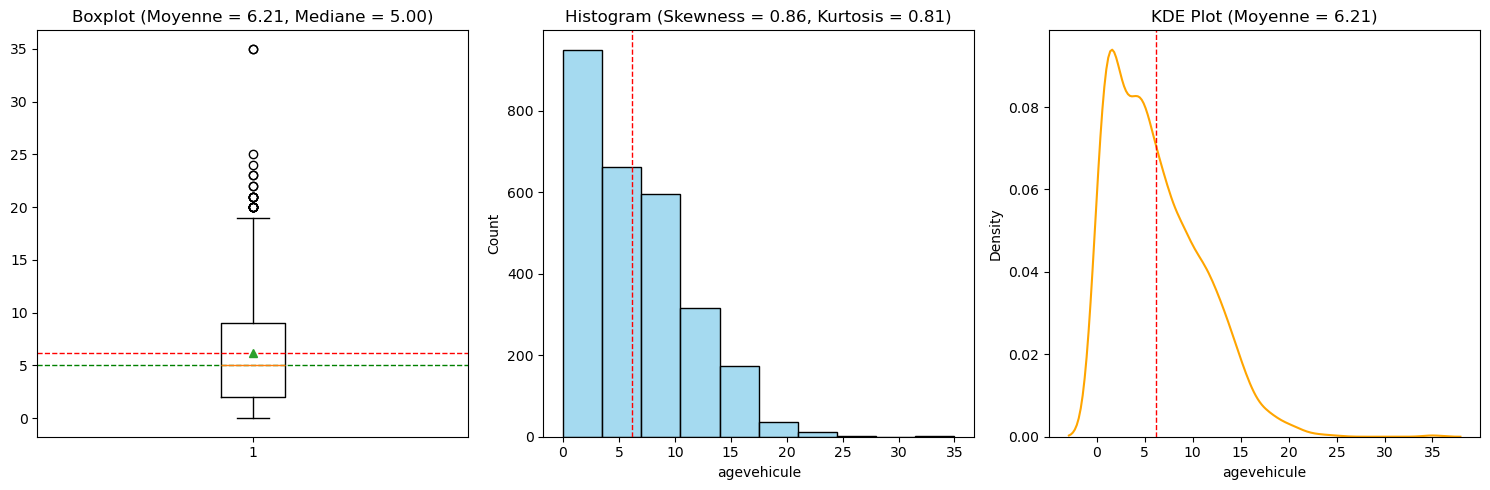

{'le minimum est ': 0,
 'le maximum est ': 35,
 'le mode est ': 1,
 'la mediane est ': 5.0,
 'la moyenne est ': 6.208439432520917,
 'les quartiles sont': array([ 0.,  2.,  5.,  9., 35.]),
 'le coefficient_variation est': 0.7618318735381912,
 'la variance est': 22.370885487510005,
 'l’ecart_type est': 4.729787044625795,
 'le coefficient_assymetrie ou skewness est': 0.8617671919815586,
 'le cofficent_applatissement ou Kurtosis est': 3.806486467520556}

In [28]:
###########------- Etude de la variable agevehicule -------###########
# Les graphiques
graph(data_var_quanti['agevehicule']) 
# Le resumé statistique
akposso_qt_resume(data_var_quanti['agevehicule'])

<span style="color:grey;">###########------- Interprétation des résultats de la variable exposition -------###########</span>
<br>
<span style="color:skyblue;"> l'exposition moyen de 0.74
<br>
 La valeur du skewness qui est de -0.765 est superieure à -3 donc la distribution étalée à gauche
<br>
 le cofficient d'applatissement ou Kurtosis est de 2.256 donc la distrdistribution est platikurtique
</span>

c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


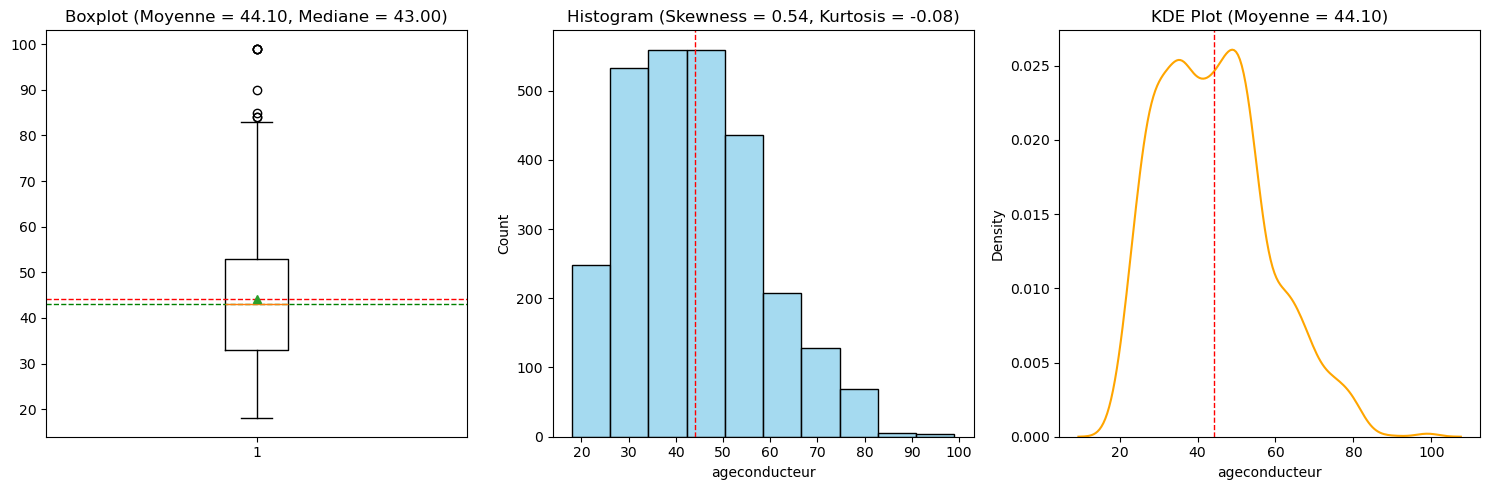

{'le minimum est ': 18,
 'le maximum est ': 99,
 'le mode est ': 47,
 'la mediane est ': 43.0,
 'la moyenne est ': 44.096034921789744,
 'les quartiles sont': array([18., 33., 43., 53., 99.]),
 'le coefficient_variation est': 0.31623501639007173,
 'la variance est': 194.4549460824476,
 'l’ecart_type est': 13.944710326229355,
 'le coefficient_assymetrie ou skewness est': 0.5415874122485014,
 'le cofficent_applatissement ou Kurtosis est': 2.922701351204936}

In [29]:
###########------- Etude de la variable ageconducteur -------###########
# Les graphiques
graph(data_var_quanti['ageconducteur']) 
# Le resumé statistique
akposso_qt_resume(data_var_quanti['ageconducteur'])

<span style="color:grey;">###########------- Interprétation des résultats de la variable exposition -------###########</span>
<br>
<span style="color:skyblue;"> l'exposition moyen de 0.74
<br>
 La valeur du skewness qui est de -0.765 est superieure à -3 donc la distribution étalée à gauche
<br>
 le cofficient d'applatissement ou Kurtosis est de 2.256 donc la distrdistribution est platikurtique
</span>

c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


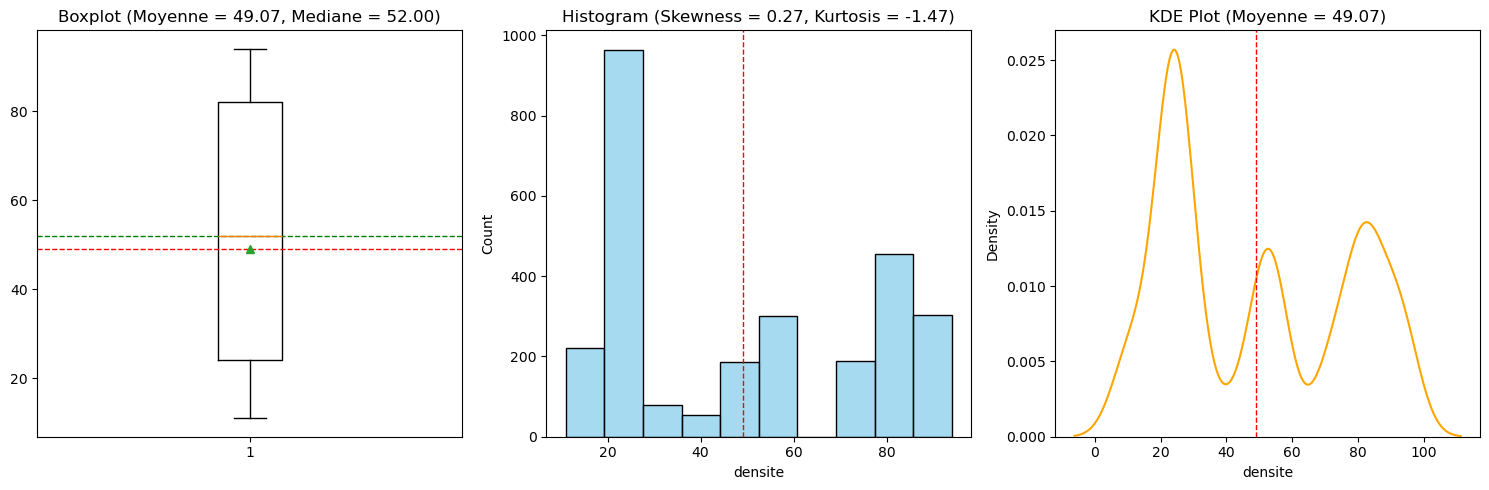

{'le minimum est ': 11,
 'le maximum est ': 94,
 'le mode est ': 24,
 'la mediane est ': 52.0,
 'la moyenne est ': 49.07238995998545,
 'les quartiles sont': array([11., 24., 52., 82., 94.]),
 'le coefficient_variation est': 0.5669047046728042,
 'la variance est': 773.9172769727015,
 'l’ecart_type est': 27.819368737854234,
 'le coefficient_assymetrie ou skewness est': 0.26712773391454997,
 'le cofficent_applatissement ou Kurtosis est': 1.534183241830472}

In [30]:
###########------- Etude de la variable densite -------###########
# Les graphiques
graph(data_var_quanti['densite']) 
# Le resumé statistique
akposso_qt_resume(data_var_quanti['densite'])

<span style="color:grey;">###########------- Interprétation des résultats de la variable exposition -------###########</span>
<br>
<span style="color:skyblue;"> l'exposition moyen de 0.74
<br>
 La valeur du skewness qui est de -0.765 est superieure à -3 donc la distribution étalée à gauche
<br>
 le cofficient d'applatissement ou Kurtosis est de 2.256 donc la distrdistribution est platikurtique
</span>

c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


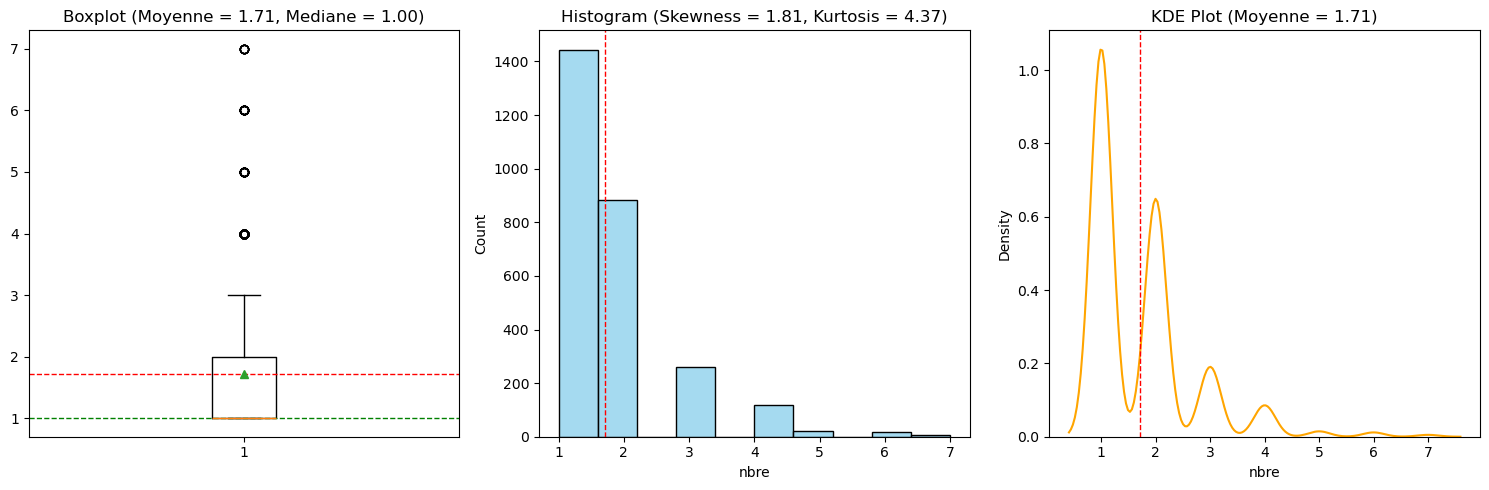

{'le minimum est ': 1,
 'le maximum est ': 7,
 'le mode est ': 1,
 'la mediane est ': 1.0,
 'la moyenne est ': 1.7122590032739178,
 'les quartiles sont': array([1., 1., 1., 2., 7.]),
 'le coefficient_variation est': 0.5630829160099871,
 'la variance est': 0.9295732526699504,
 'l’ecart_type est': 0.9641437925278316,
 'le coefficient_assymetrie ou skewness est': 1.8111950478837746,
 'le cofficent_applatissement ou Kurtosis est': 7.3732959323209855}

In [31]:
###########------- Etude de la variable nbre -------###########
# Les graphiques
graph(data_var_quanti['nbre']) 
# Le resumé statistique
akposso_qt_resume(data_var_quanti['nbre'])

<span style="color:grey;">###########------- Interprétation des résultats de la variable exposition -------###########</span>
<br>
<span style="color:skyblue;"> l'exposition moyen de 0.74
<br>
 La valeur du skewness qui est de -0.765 est superieure à -3 donc la distribution étalée à gauche
<br>
 le cofficient d'applatissement ou Kurtosis est de 2.256 donc la distrdistribution est platikurtique
</span>

c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Moussa MOLBA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


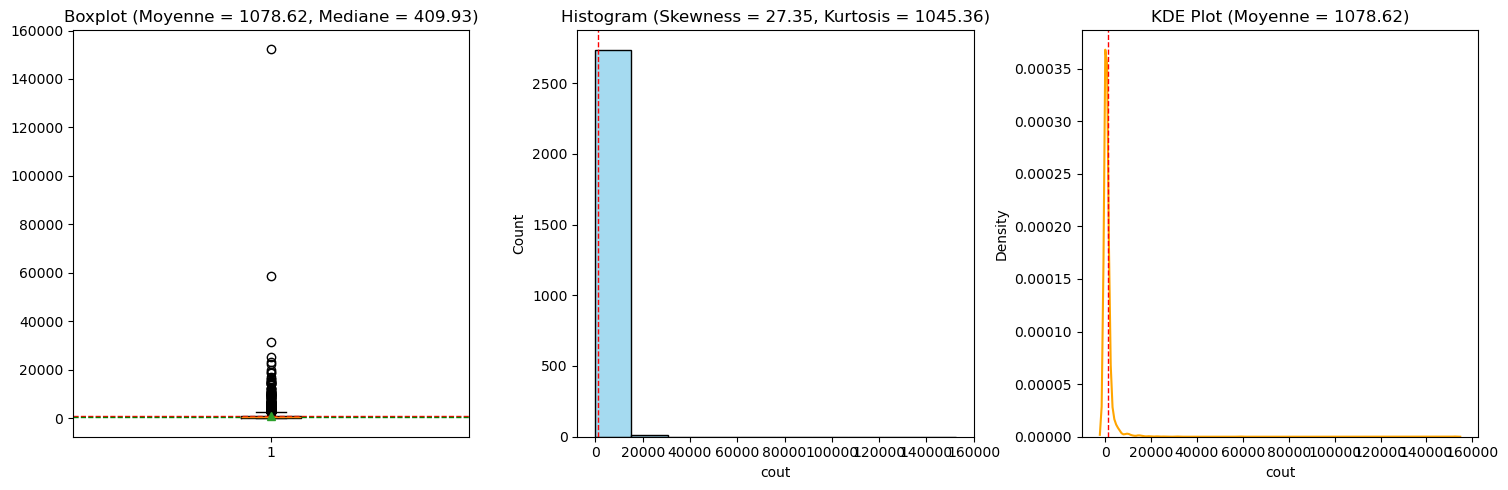

{'le minimum est ': 0.0,
 'le maximum est ': 152449.02,
 'le mode est ': 0.0,
 'la mediane est ': 409.93,
 'la moyenne est ': 1078.619494361586,
 'les quartiles sont': array([0.0000000e+00, 1.3738000e+02, 4.0993000e+02, 1.1281200e+03,
        1.5244902e+05]),
 'le coefficient_variation est': 3.4280709128694764,
 'la variance est': 13672128.285096426,
 'l’ecart_type est': 3697.5841146749353,
 'le coefficient_assymetrie ou skewness est': 27.349687198580884,
 'le cofficent_applatissement ou Kurtosis est': 1048.35974756981}

In [32]:
###########------- Etude de la variable cout -------###########
# Les graphiques
graph(data_var_quanti['cout']) 
# Le resumé statistique
akposso_qt_resume(data_var_quanti['cout'])

<span style="color:grey;">###########------- Interprétation des résultats de la variable exposition -------###########</span>
<br>
<span style="color:skyblue;"> l'exposition moyen de 0.74
<br>
 La valeur du skewness qui est de -0.765 est superieure à -3 donc la distribution étalée à gauche
<br>
 le cofficient d'applatissement ou Kurtosis est de 2.256 donc la distrdistribution est platikurtique
</span>

# Statistique univariee des valeurs qualitatives